# Taylor approximation

For analytic function equivalence between value of a function at each point or value of all derivatives at a single point.  Really?

We consider approximating the function 
$$h(t) = t^2 e^{3t}$$
in the neighbourhood of some value $t=t_0$.  The first-order Taylor approximation to $h(t)$ is
$$h_1(t) = h(t_0) + h'(t_0) (t-t_0),$$
where $h'(t)$ is the derivative of $h(t)$.

We define the symbolic function $h(t)$ and find its symbolic derivative $h'(t)$:

In [2]:
import sympy as sp

t = sp.symbols('t');
h = sp.exp(3*t)*t**2;  # h(t)
hp = h.diff(t);  # h'(t)
hp

3*t**2*exp(3*t) + 2*t*exp(3*t)

We want to evaluate $h(t_0)$ and $h'(t_0)$ so that we can use the approximation.  We don't yet have to put in a value so we just substitute the symbol `t0`.  The result will then be a symbolic expression in `t` and `t0`:

In [4]:
t0 = sp.symbols('t0');
h0 = h.subs(t,t0);  # h(t0)
h1 = h0 + hp.subs({t:t0})*(t-t0);  # h1(t) Taylor approximation at t0
print(h1);

t0**2*exp(3*t0) + (t - t0)*(3*t0**2*exp(3*t0) + 2*t0*exp(3*t0))


For a fixed value for `t0` we can plot the symbolic function $h(t)$ and the first-order Taylor expansion $h'(t)$ at that point:

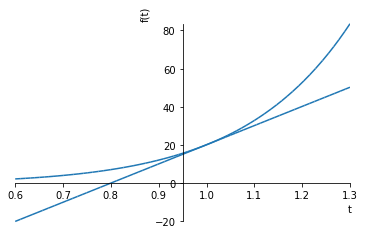

In [10]:
h1s = h1.subs(t0, 1);  # h1(t) for value t0=1
sp.plot(h, h1s, (t,0.6,1.3));

The previous cell used a symbolic plotting function.  We could instead convert the symbolic expressions to functions that can be evaluated numerically using

In [11]:
lam_h = sp.lambdify(t, h, modules=['numpy'])
lam_h1s = sp.lambdify(t, h1s, modules=['numpy'])

and then plot from samples of `tv`:

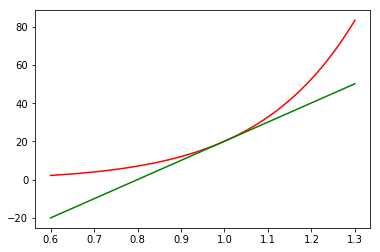

In [12]:
import numpy as np
import matplotlib.pyplot as plt

tv = np.linspace(0.6, 1.3, 100);  
h_vals = lam_h(tv);  h1s_vals = lam_h1s(tv)
fig, ax = plt.subplots(1,1);
ax.plot(tv, h_vals, 'r-', tv, h1s_vals, 'g-');

In [1]:
%run src/labX_preamble.py  # For internal notebook functions

Taylor 5:  531*(t - 1)**5*exp(3)/40 + 135*(t - 1)**4*exp(3)/8 + 33*(t - 1)**3*exp(3)/2 + 23*(t - 1)**2*exp(3)/2 + 5*(t - 1)*exp(3) + exp(3)


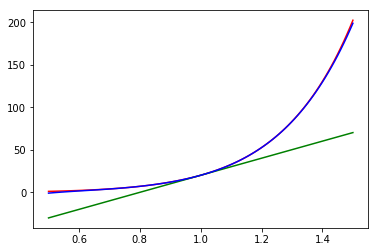

In [7]:
%%writefileexec src/lab_taylorexp-1.py -s  # dump cell to file before execute

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Symbolic function and derivatives
h, t = sp.symbols('h t');
h = sp.exp(3*t)*t**2;
hp = h.diff(t);
#hpp = hp.diff(t);

# Taylor expansions around point t0
t0 = 1;
h0 = h.subs(t,t0);
h1 = h0 + hp.subs({t:t0})*(t-t0);
#h2 = h0 + hp.subs(t,t0)*(t-t0) + 1/2*hpp.subs(t,t0)*(t-t0)**2;

# Direct Taylor expansion using sympy
h5s = sp.series(h, t, t0, 6).removeO();
print("Taylor 5: ", h5s);

# Convert symbolic to functions that can be evaluated
lam_h = sp.lambdify(t, h, modules=['numpy']);
lam_h1 = sp.lambdify(t, h1, modules=['numpy']);
lam_h5s = sp.lambdify(t, h5s, modules=['numpy']);

# Plots
fig, ax = plt.subplots(1,1);
t_vals = np.linspace(0.5, 1.5, 100);
ax.plot(t_vals, lam_h(t_vals), 'r');
ax.plot(t_vals, lam_h1(t_vals), 'g');
#ax.plot(t_vals, lam_h5s(t_vals), 'b');

# Symbolic plotting also probably works
#sp.plot(h, h1, (t, 0, 1.5))

# Tasks

These tasks involve writing code, or modifying existing code, to meet the objectives described.

1.  Generate Taylor series expansions of order 5, 9, and 13 centered around the point $t=0$ for the function $x(t) = \sin(t)$.  Plot all of these functions on the same set of axes over the domain $t=-2\pi$ to $t=2\pi$, with a range from $-1.5$ to $1.5$.<br><br>

2.  xxx